# Synthetic Data Generation Example

This notebook generates a single example dataset using a Poisson distribution to simulate crime hotspots. 

**Note:**  
- This single dataset is stored locally as an example in the repository.  
- For robust experimentation, multiple datasets were generated and stored externally (see `../external_data` folder for bulk simulations).

### Local (example) dataset:
- `../data/examples/poisson_example_20x20.csv`

### External bulk simulations:
- `../uncertainty-informed-data/simulations/poisson/`

In [1]:
import sys, os
import json
import numpy as np

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../../"))
sys.path.insert(0, project_root)

config_path = os.path.join("..", "config.json")
with open(config_path, 'r') as f:
    config = json.load(f)

from src.data_generation.hotspots import PoissonHotspots


## parms
params=config["data_generation"]


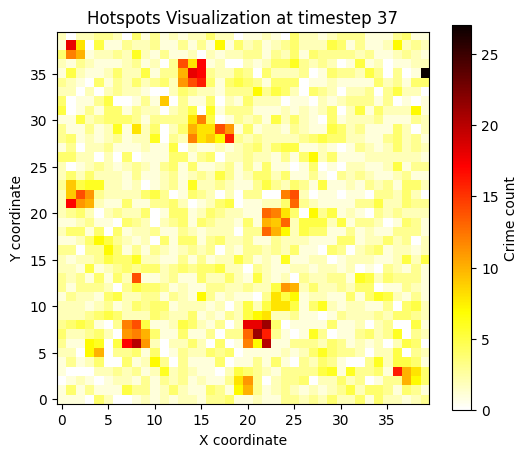

In [3]:
# initial example data
hotspots_generator = PoissonHotspots(
                        rows=params["rows"],
                        cols=params["cols"],
                        time_steps=params["time_steps"],
                        base_lam=params["lam"],
                        n_hotspots=params["hotspots_num"],
                        hotspot_strength_range=tuple(params["hotspot_strength_range"]),
                        hotspot_size_range=tuple(params["hotspot_size_range"]),
                        noise_level=params["noise_level"],
                        random_state=42
                    )
data_example = hotspots_generator.generate()

df_example = hotspots_generator.to_dataframe()
output_path = "../data/examples/poisson_example_40x40.csv"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
df_example.to_csv(output_path, index=False)

hotspots_generator.visualize(timestep=np.random.randint(params["time_steps"]))

Saved simulation 1 to 
Saved simulation 2 to 
Saved simulation 3 to 
Saved simulation 4 to 
Saved simulation 5 to 


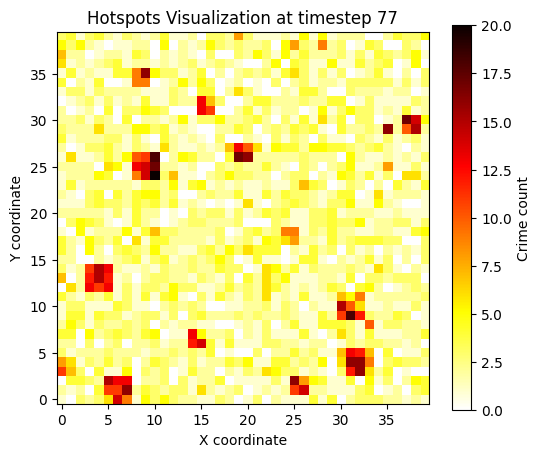

In [7]:
external_simulations = os.path.abspath(os.path.join(os.path.dirname(project_root), "uncertainty-informed-data", "simulations", "poisson"))
os.makedirs(external_simulations, exist_ok=True)


num_simulations = params["num_simulations"]
initial_seed = 100

for i in range(num_simulations):
    random_state = initial_seed + i
    generator = PoissonHotspots(
        rows=params["rows"],
        cols=params["cols"],
        time_steps=params["time_steps"],
        base_lam=params["lam"],
        n_hotspots=params["hotspots_num"],
        hotspot_strength_range=tuple(params["hotspot_strength_range"]),
        hotspot_size_range=tuple(params["hotspot_size_range"]),
        noise_level=params["noise_level"],
        random_state=random_state
    )

    data = generator.generate()
    df = generator.to_dataframe()

    filename = f"poisson_simulation_{i+1:02d}_seed_{random_state}.csv"
    file_path = os.path.join(external_simulations, filename)

    df.to_csv(file_path, index=False)
    print(f"Saved simulation {i+1} to ")

# Visualización de muestra
generator.visualize(timestep=np.random.randint(params["time_steps"]))
